# HR Analytics Project- Understanding the Attrition in HR
#### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting style and color palette
sns.color_palette("Set2")
sns.set_style("whitegrid")

### Uploading Dataset

In [3]:
df =pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.set_option("display.max_columns",None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [5]:
# Let's check number of rows and columns in our data
print("We have rows --> {}  \nand columns --> {} \nin our dataset.".format((len(df)),(len(df.columns))))

We have rows --> 1470  
and columns --> 35 
in our dataset.


In [6]:
# Let's check the data type
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

`There are 35 columns in our dataset with integer and object datatypes`.

In [7]:
# Let's check full information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

`In dataset we contains 0 to 1470 rows and total 35 columns`.

`Dataset is composed of 3 types of datatype-`
* `object - 9columns`
* `integer -26columns`


In [8]:
# Checking null values

if df.isnull().sum().any()==True:
    print("Null values present in dataset")
else:
    print("There is no null values in dataset")

There is no null values in dataset


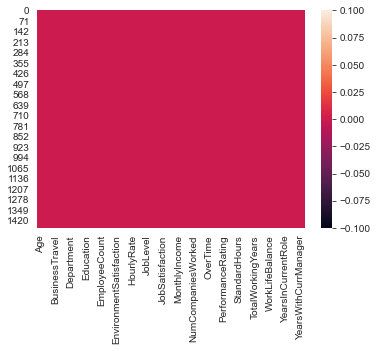

In [9]:
sns.heatmap(df.isnull())

##### No null values in dataset.

In [10]:
# Let's check the duplicate values in data
if df.duplicated().sum().any()==True:
    print("Our data contains duplicate values")
else:
    print("There are no duplicate values in our data")

There are no duplicate values in our data


In [11]:
# checking the columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
# Let's check features description
df.describe()    

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Key Observations:-
1. some columns have difference in mean and median values.
2. In some columns mean is greater than median which causes left skewed,while in some columns mean is less than median causes right skeweness.
3. Constant data Columns (Can be removed) - EmployeeCount, StandardHours.
4. Unique Identifiers - EmployeeNumber

In [13]:
# Droping unwanted columns
df.drop(['EmployeeCount','StandardHours'],axis=1,inplace=True)

### checking distinct values from categorical features
numerical_features=df.select_dtypes(include=[np.number])
categorical_features=df.select_dtypes(include=[np.object])

In [14]:
# Finding distinct values from categorical features
for i in df.columns:
    if df[i].dtype=="object":
        print("The {}  column contains distinct values are \n{}".format(i,df[i].value_counts()))
        print("\n")
     

The Attrition  column contains distinct values are 
No     1233
Yes     237
Name: Attrition, dtype: int64


The BusinessTravel  column contains distinct values are 
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


The Department  column contains distinct values are 
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


The EducationField  column contains distinct values are 
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


The Gender  column contains distinct values are 
Male      882
Female    588
Name: Gender, dtype: int64


The JobRole  column contains distinct values are 
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Represe

`From above ,we find that Over18 column contians only one distinct value.So there is no need of this column, we can drop this column during spliting data.`

In [15]:
# Droping unwanted feature from categorical features
df.drop(['Over18'],axis=1,inplace=True)

Percentage of Yes values 16.12
Percentage of No values 83.88


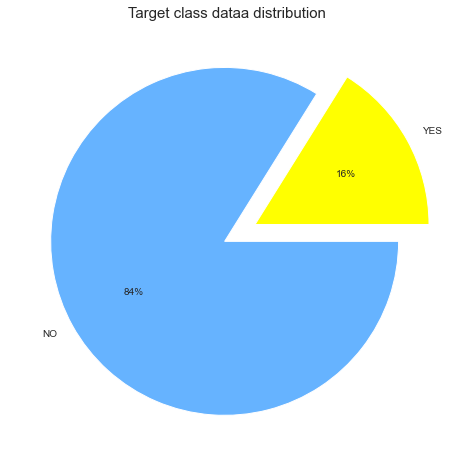

In [16]:
# Checking whether data is balanced or imbalanced
Yes =df['Attrition'].value_counts()[1]
No =df['Attrition'].value_counts()[0]
total=df['Attrition'].value_counts()[1] + df['Attrition'].value_counts()[0]
print("Percentage of Yes values "+str(round((Yes/total)*100,2)))
print("Percentage of No values "+str(round((No/total)*100,2)))

plt.figure(figsize=(12,8))
plt.pie([Yes, No], labels=['YES', 'NO'], autopct='%1.0f%%', colors = ['yellow','#66b3ff'],explode=(0.2,0))
plt.title(" Target class dataa distribution",fontsize=15)
plt.show()

`Well we have imbalanced data as there are two values in target columns in which No 84% of total data while Yes 16% of total data.`

In [17]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [18]:
Male =df['Gender'].value_counts()[0]
Male

882

In [19]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

Percentage of Male values 60.0%
Percentage of Female values 40.0%


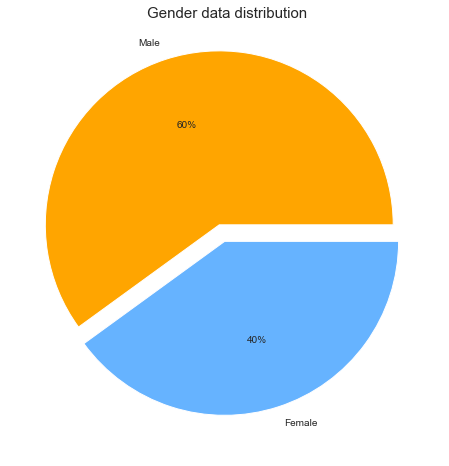

In [20]:
# Checking whether data is balanced or imbalanced
Male =df['Gender'].value_counts()[0]
Female =df['Gender'].value_counts()[1]
total=df['Gender'].value_counts()[0] + df['Gender'].value_counts()[1]
print("Percentage of Male values "+str(round((Male/total)*100,2))+"%")
print("Percentage of Female values "+str(round((Female/total)*100,2))+"%")

plt.figure(figsize=(12,8))
plt.pie([Male, Female], labels=['Male', 'Female'], autopct='%1.0f%%', colors = ['orange','#66b3ff'],explode=(0.1,0))
plt.title(" Gender data distribution",fontsize=15)
plt.show()

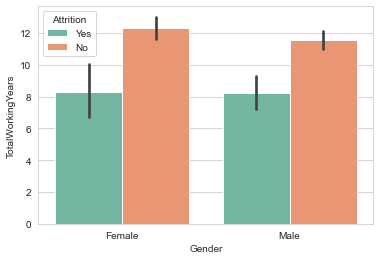

In [21]:
sns.barplot(x=df['Gender'],y=df['TotalWorkingYears'],hue=df['Attrition'],palette='Set2')

##### Above graph shows that when total working years are less than attrition rises while when totalworking years are high then there is less attrition.

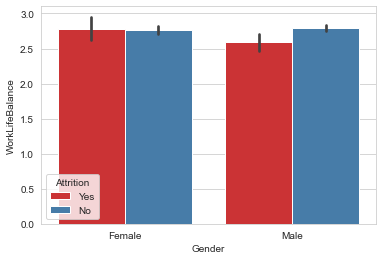

In [22]:
sns.barplot(x=df['Gender'],y=df['WorkLifeBalance'],hue=df['Attrition'],palette='Set1')

##### Work life balance of Males is slightly distrubed as compared to Females.

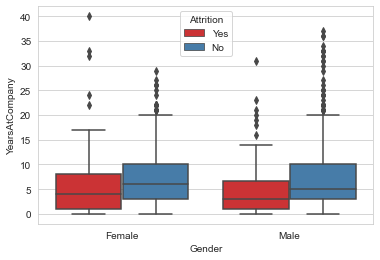

In [23]:
sns.boxplot(x=df['Gender'],y=df['YearsAtCompany'],hue=df['Attrition'],palette='Set1')

###### YearsAtCompany doesn't signify any major difference between male and female for attrition.

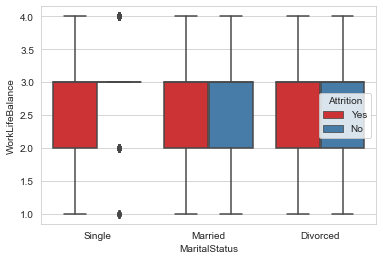

In [24]:
sns.boxplot(x=df['MaritalStatus'],y=df['WorkLifeBalance'],hue=df['Attrition'],palette='Set1')

In [25]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


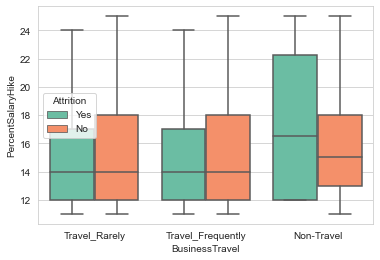

In [26]:
sns.boxplot(x=df['BusinessTravel'],y=df['PercentSalaryHike'],hue=df['Attrition'],saturation=0.90,palette='Set2')

###### Those who are non-traveler  have high attrition rate than others.

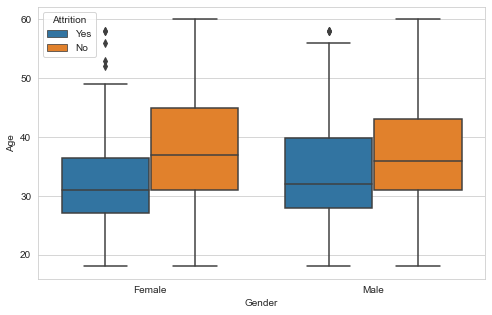

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x = df.Gender , y = df.Age,  hue = df.Attrition)

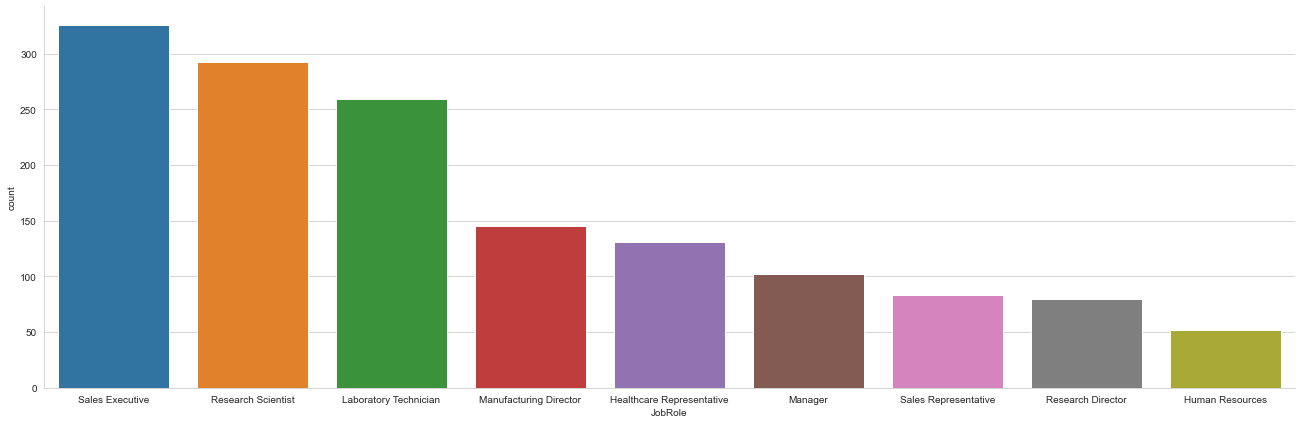

In [28]:
sns.factorplot(data=df,kind='count', size=6, aspect=3, x='JobRole')
plt.show()

### Data Cleaning

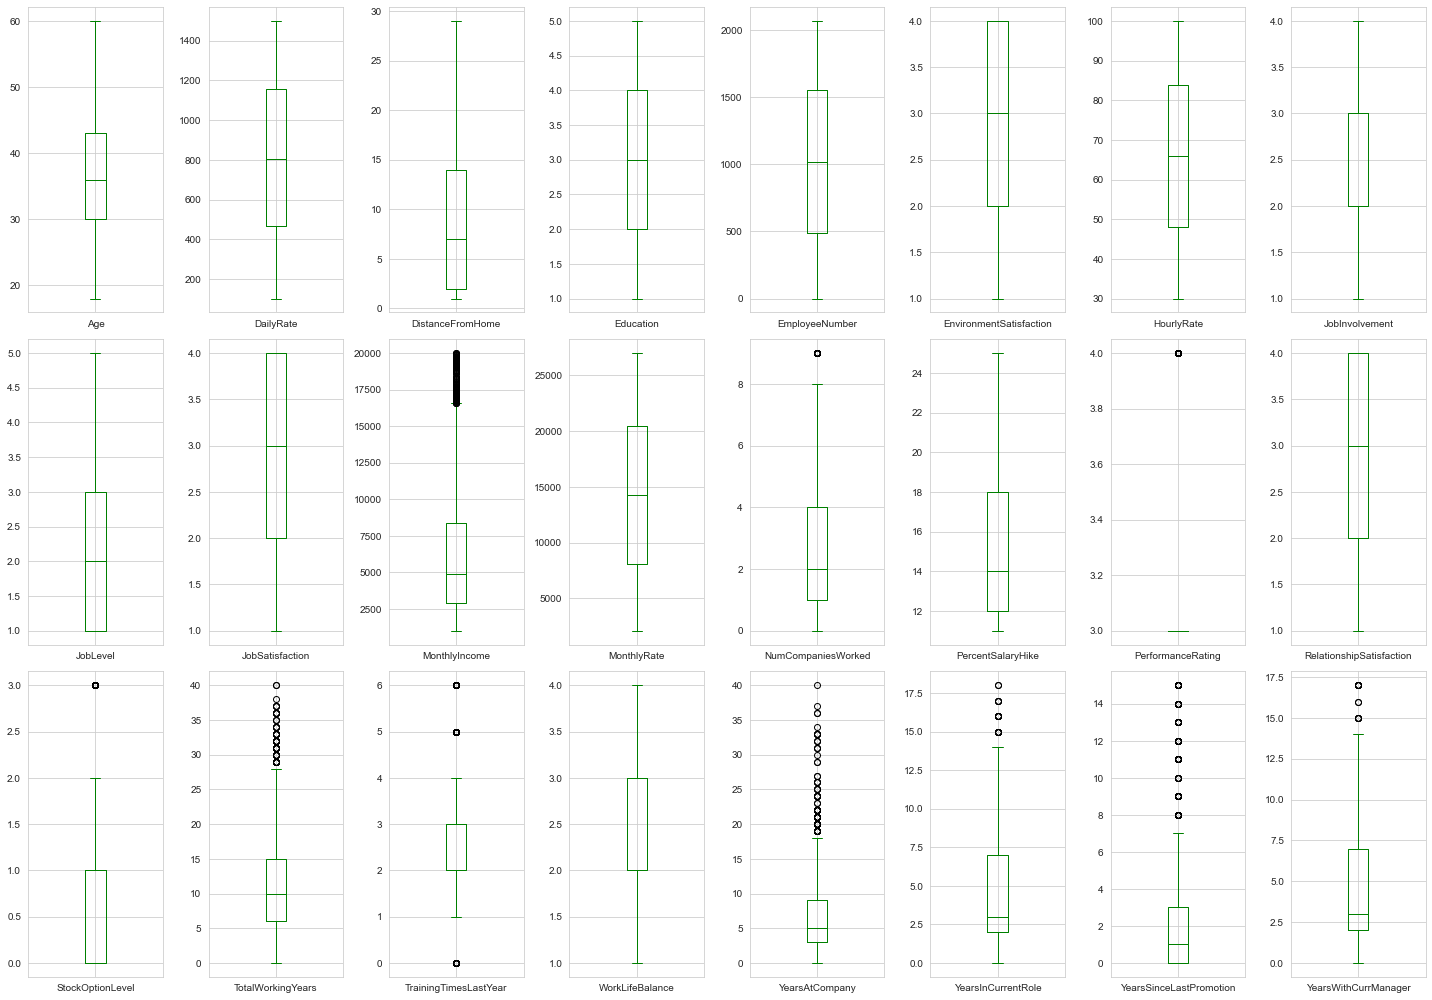

In [29]:
# Checking outliers
df.plot(kind='box',subplots=True,layout=(3,8),figsize=(20,14),color='green')

plt.tight_layout()
plt.show()

###### Some columns contains outliers like TotalworkingHours, YearsAtCompany ,YearsWithCurManager,Monthlyincoome  and some columns contains single values which show no information ,that to be removed from dataset.

In [30]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


### Encoding columns

In [31]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

In [32]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


# Outliers  removal 
from scipy.stats import zscore
z=np.abs(zscore(df))

df=df[(z<3).all(axis=1)]

df.shape,df.shape

print("Percentage loss of data {}%".format(round((len(df)-len(df))/len(df)*100,2)))

#### Not removing outliers as it leads to 5-6% data loss.

### Skewness 

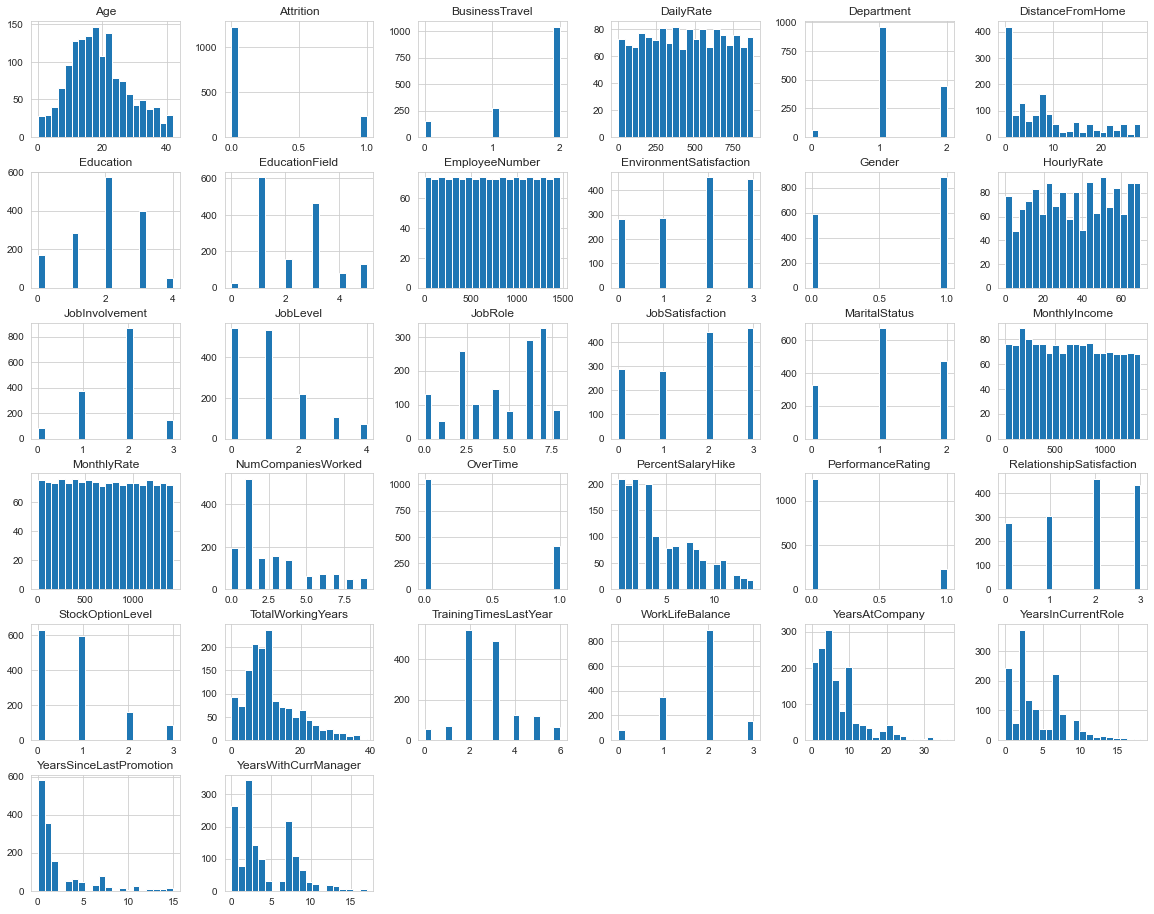

In [33]:
df.hist(bins=20,grid=True,figsize=(20,16),layout=(6,6))
plt.show()

#### Some skewness is present in some columns like  PerformanceRatingetc.Let's check the values of skewness.

In [34]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                   0.000930
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.060816
MonthlyRate                 0.012315
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.112899
TrainingTimesLastYear       0.553124
W

# Now lets remove the skewness
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])

##### We are not treating skewness because it will create problem during upsampling.

In [35]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,22,1,3,1465,2,1,11,3,1,2,3,1,210,599,4,0,6,0,2,1,17,3,2,5,2,0,3
1466,21,0,2,327,1,5,0,3,1466,3,1,12,1,2,0,0,1,1070,1123,4,0,4,0,0,1,9,5,2,7,7,1,7
1467,9,0,2,39,1,3,2,1,1467,1,1,57,3,1,4,1,1,821,175,1,1,9,1,1,1,6,0,2,6,2,0,3
1468,31,0,1,579,2,1,2,3,1468,3,1,33,1,1,7,1,1,730,641,2,0,3,0,3,0,17,3,1,9,6,0,8


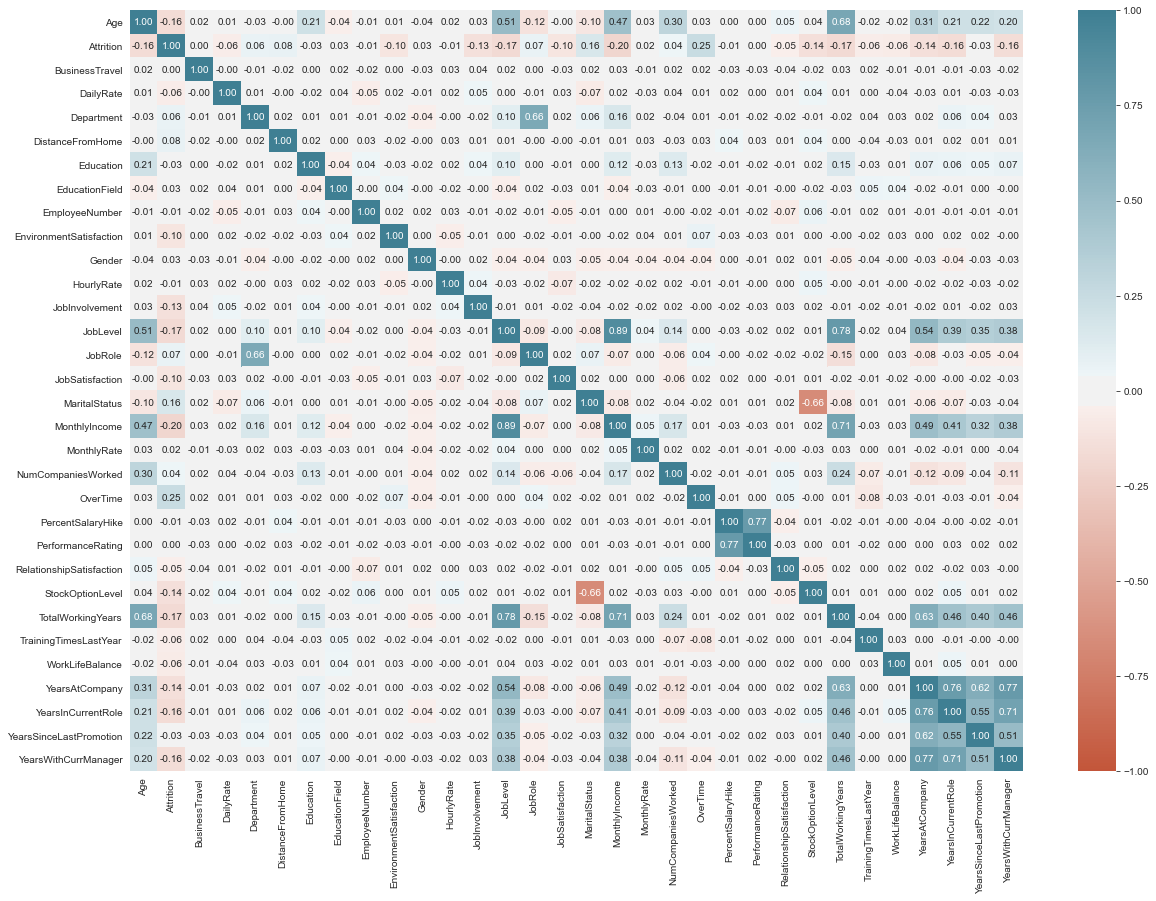

In [36]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,fmt='.2f',vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

##### Key Observations :-
###### From the correlation graph we can see that in some of the independent columns ,`multicolinearity` is present. 
1. Like` MonthlyIncome` and `Joblevel` share a strong correlation of 89% dependence between them.
2. `TotalWorkingYear`  and `JobLevel` also shares a strong correlation of more than 75% dependence on each other.
3. `TotalWorkingYear` also have correaltion with `Age` which shares a correaltion of 68% dependence on each other.
4. `Marital_Status` are negatively related to `stockoptionlevel` with a dependence of 66% .

But there is no strong correaltion between target feature and independent features.

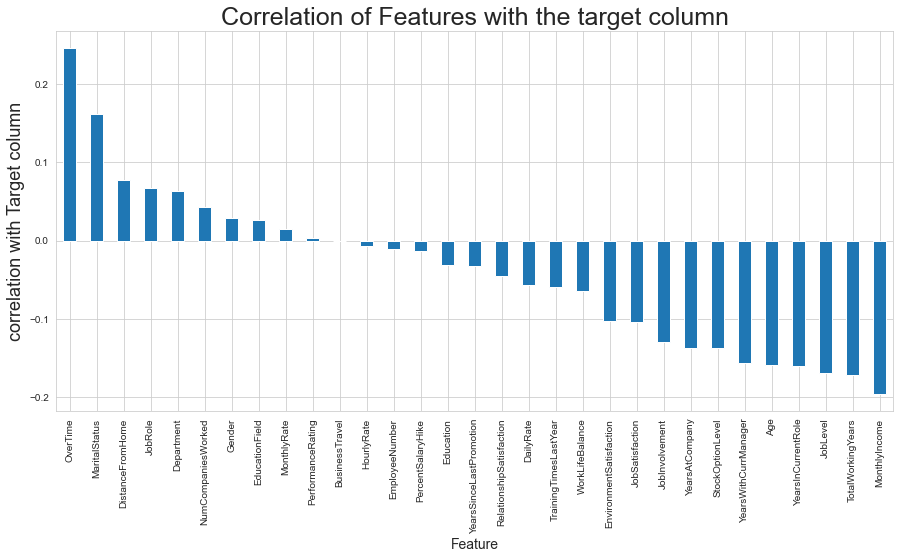

In [37]:
plt.figure(figsize=(15,7))
df.corr()["Attrition"].sort_values(ascending=False).drop(["Attrition"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Features with the target column", fontsize=25)
plt.show()

### Splitting dependent and independent variables

In [38]:

y=df['Attrition']
x=df.drop(['Attrition'],axis=1)

In [39]:
features=x.columns

In [40]:
x.head(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,0,1,0,64,2,1,7,3,2,809,999,8,1,0,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,1,2,1,31,1,1,6,1,1,682,1328,1,0,12,1,3,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,2,3,1,62,1,0,2,2,2,62,18,6,1,4,0,1,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,3,3,0,26,2,0,6,2,1,313,1228,1,1,0,0,2,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,4,0,1,10,2,0,2,1,1,399,846,9,0,1,0,3,1,6,3,2,2,2,2,2


from collections import Counter
print("Original dataset shape {}".format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(Y)))


In [41]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_scale=scale.fit_transform(x)


In [42]:
x=pd.DataFrame(X_scale,columns=features)


### Splitting data into training and testing

In [43]:

from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25)

In [44]:
X_train.shape,Y_train.shape

((1102, 31), (1102,))

In [45]:
X_test.shape,Y_test.shape

((368, 31), (368,))

### Implementing oversampling for handling imbalanced

In [46]:
from imblearn.combine import SMOTETomek


smk=SMOTETomek(random_state=42)
X_res,Y_res=smk.fit_sample(X_train,Y_train)

In [47]:
X_res.shape,Y_res.shape

((1840, 31), (1840,))

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=.25)

In [49]:
# finding best random state
max_acc=0
max_rstate=0
for i in range(0,500):
    X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=.25,random_state=i)
    tree=DecisionTreeClassifier()
    tree.fit(X_train,Y_train)
    pred=tree.predict(X_test)
    acc=accuracy_score(Y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_rstate=i
print("MAximum accuracy score {:.2f} at random state {}".format(max_acc,max_rstate))

MAximum accuracy score 0.90 at random state 157


#### Best random state is - 157

In [50]:
def model(model):
    X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=.25,random_state=157)
    model.fit(X_train,Y_train)
    print("Training score of", model ,"is ",model.score(X_train,Y_train))
    predm=model.predict(X_test)
    print('Accuracy score',accuracy_score(Y_test,predm))
    print("Cross valildation mean is ->",cross_val_score(model,X_res,Y_res,cv=6).mean())
    print("Cross valildation std is ->",cross_val_score(model,X_res,Y_res,cv=6).std())
    print(confusion_matrix(Y_test,predm))
    print(classification_report(Y_test,predm))
    
    fpr,tpr,thresholds=roc_curve(Y_test,predm)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score',roc_auc)
    
    print('\n')

In [51]:
lg=LogisticRegression()
model(lg)

Training score of LogisticRegression() is  0.8188405797101449
Accuracy score 0.8065217391304348
Cross valildation mean is -> 0.8076224337002263
Cross valildation std is -> 0.0200797545562865
[[179  52]
 [ 37 192]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       231
           1       0.79      0.84      0.81       229

    accuracy                           0.81       460
   macro avg       0.81      0.81      0.81       460
weighted avg       0.81      0.81      0.81       460

roc_auc_score 0.806659861245014




In [52]:
dtc=DecisionTreeClassifier()
model(dtc)

Training score of DecisionTreeClassifier() is  1.0
Accuracy score 0.8934782608695652
Cross valildation mean is -> 0.8532853604706451
Cross valildation std is -> 0.06795789779928743
[[207  24]
 [ 25 204]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       231
           1       0.89      0.89      0.89       229

    accuracy                           0.89       460
   macro avg       0.89      0.89      0.89       460
weighted avg       0.89      0.89      0.89       460

roc_auc_score 0.89346679521352




In [53]:
svm=SVC() 
model(svm)

Training score of SVC() is  0.9710144927536232
Accuracy score 0.9152173913043479
Cross valildation mean is -> 0.930980463122636
Cross valildation std is -> 0.016751779763048848
[[205  26]
 [ 13 216]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       231
           1       0.89      0.94      0.92       229

    accuracy                           0.92       460
   macro avg       0.92      0.92      0.92       460
weighted avg       0.92      0.92      0.92       460

roc_auc_score 0.9153386642469612




In [54]:
gnb=GaussianNB()
model(gnb)

Training score of GaussianNB() is  0.7297101449275363
Accuracy score 0.717391304347826
Cross valildation mean is -> 0.7163444820563042
Cross valildation std is -> 0.038985297517059994
[[150  81]
 [ 49 180]]
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       231
           1       0.69      0.79      0.73       229

    accuracy                           0.72       460
   macro avg       0.72      0.72      0.72       460
weighted avg       0.72      0.72      0.72       460

roc_auc_score 0.7176884251120059




In [55]:
rfc=RandomForestClassifier()
model(rfc)

Training score of RandomForestClassifier() is  1.0
Accuracy score 0.9326086956521739
Cross valildation mean is -> 0.9370019089792992
Cross valildation std is -> 0.07463881562982351
[[219  12]
 [ 19 210]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       231
           1       0.95      0.92      0.93       229

    accuracy                           0.93       460
   macro avg       0.93      0.93      0.93       460
weighted avg       0.93      0.93      0.93       460

roc_auc_score 0.9325412578687687




##### Using and testing above models we conclude that ` RandomForestClassifier`  is giving better results than others.

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
rf_params = {'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

grfc = GridSearchCV(estimator=rfc,param_grid=rf_params)
grfc.fit(X_train,Y_train)
print(grfc.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


In [58]:
rfc=RandomForestClassifier(criterion="gini", max_features="auto",max_depth =8)
rfc.fit(X_train,Y_train)
rfc.score(X_train,Y_train)
pred_decision =rfc.predict(X_test)

rfc_a = accuracy_score(Y_test,pred_decision)
print(rfc_a)
rfc_c = classification_report(Y_test,pred_decision)
print(rfc_c)

rfc_score = cross_val_score(rfc,X_res,Y_res,cv=8)
rfc_cv =rfc_score.mean()
print(rfc_cv)

0.9173913043478261
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       231
           1       0.94      0.90      0.92       229

    accuracy                           0.92       460
   macro avg       0.92      0.92      0.92       460
weighted avg       0.92      0.92      0.92       460

0.9309782608695651


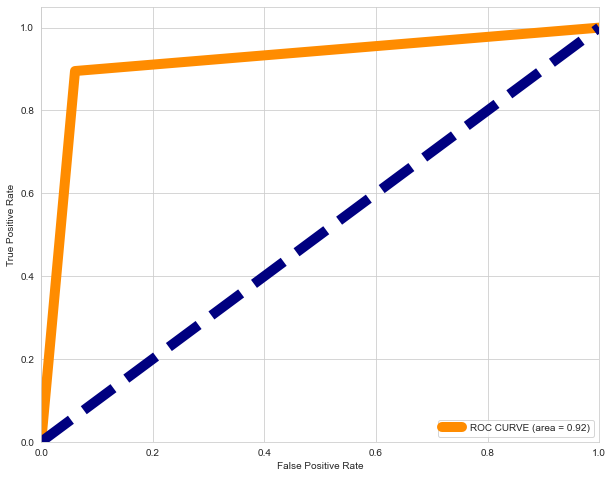

In [59]:
fpr,tpr,thresholds=roc_curve(Y_test,pred_decision)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

## Saving model

In [60]:
import joblib
filename='rfc_analytics.obj'
joblib.dump(rfc,filename)

['rfc_analytics.obj']

In [61]:
# Loading model
model=joblib.load(filename)
model

RandomForestClassifier(max_depth=8)

## Conclusion

In [62]:
conclusion=pd.DataFrame([model.predict(X_test),Y_test],index=["Predicted","Original"])
conclusion


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459
Predicted,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,1,0,1,1,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
Original,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,1,0,0,1,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,0,1,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,1,1,0,0,0,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
